In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import numpy.linalg as la
import math
import random
from mpl_toolkits.mplot3d import Axes3D
import time

In [2]:
#Sets up the basic class for creating the objects in the solar system
class makeplanet:
    
    #This will create the planet and assign the necessary elements to each planet (i.e. Name, Mass, Position, Velocity)
    def __init__(self,name, mass, x,y,z,vx,vy,vz):
        self.name = name
        self.mass = mass
        self.x = x
        self.y = y
        self.z = z
        self.vx = 365*vx
        self.vy = 365*vy
        self.vz = 365*vz

In [3]:
sun = makeplanet("Sun", 1.00, 0.0,0.0,0.0,0.0,0.0,0.0)
mercury = makeplanet("Mercury",1.65E-07,2.80E-01,1.73E-01,-1.18E-02,-2.01E-02,2.53E-02,3.91E-03)
venus = makeplanet("Venus", 2.45E-06, -7.02E-02, 1.36E-01, 4.24E-02, -3.81E-03, -1.99E-02, -5.40E-05)
earth = makeplanet("Earth", 3.0E-06, -9.88E-01, 8.50E-02, -1.52E-04, -1.68E-03, -1.71E-02, 4.35E-07) 
mars = makeplanet("Mars", 3.3E-07, 7.78E-01, 1.28, 7.56E-03, -1.14E-02, 8.47E-03, 4.58E-04)
jupiter = makeplanet('Jupiter', 0.00095, -5.23, -1.53, 1.23E-01,2.02E-3, -6.88E-03, -1.67E-05)
saturn = makeplanet("Saturn", 0.000275, -1.48,-9.93, 2.32E-01, 5.212E-03, -8.39E-04, -1.93E-04)
uranus = makeplanet("Uranus", 0.000044, 1.82E01, 8.08, -2.06E-01, -1.62E-03, 3.41E-03, 3.38E-05)
neptune = makeplanet("Neptune", 0.0000515, 2.84E01, -9.47, -4.60E-01,9.711E-04, 2.997E-03, -8.38E-05)
pluto = makeplanet("Pluto", 6.55E-09, 9.89, -3.18E01, 5.396E-01, 3.06E-03, 2.906E-04, -9.09E-04)

In [4]:
def plotter(x,y,z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x,y,z,s=5)

    ax.set_xlabel('AU x-axis')
    ax.set_ylabel('AU y-axis')
    ax.set_zlabel('Au z-axis')
    
def position(planet):
    return [planet.x, planet.y, planet.z]
    
def velocity(planet):
    return [planet.vx, planet.vy, planet.vz]

def r(planet):
    return (planet.x**2+ planet.y**2+ planet.z**2)**(0.5)

def rbetween(x1,y1,z1,x2,y2,z2):
    return ((x1-x2)**2+ (y1-y2)**2+ (z1-z2)**2)**(0.5)

In [5]:
def oneplanet(t, planet):
    def coorx(xi, h,vxi, axi):
        return xi + h*vxi+h**2*axi/2

    def velx(vxi, h, ax_i_1,ax_i):
        return vxi + (h/2)*(ax_i_1+ax_i)

    def accx(coor, dist):
        return -4*math.pi**2*coor/(dist**3)


    time = t #The number of years we want to loop over
    h = 1/365 #The step size, defined as one day
    n = int(t/h) #The total numbers of iterations

    coordinatesx = np.zeros(n+1)
    velocitiesx = np.zeros(n+1)

    coordinatesx[0] = planet.x
    velocitiesx[0] = planet.vx
    rad = r(planet)

    for i in range(n):
        x_i = coordinatesx[i]
        vx_i = velocitiesx[i]
        ax_i = accx(x_i, rad)
        x_i_1 = coorx(x_i, h,vx_i,ax_i)
        coordinatesx[i+1] = x_i_1
        ax_i_1 = accx(x_i_1, rad)
        vx_i_1 = velx(vx_i,h,ax_i_1,ax_i)
        velocitiesx[i+1] = vx_i_1

    def coory(yi, h,vyi, ayi):
        return yi + h*vyi+h**2*ayi/2

    def vely(vyi, h, ay_i_1,ay_i):
        return vyi + (h/2)*(ay_i_1+ay_i)

    def accy(coor, dist):
        return -4*math.pi**2*coor/(dist**3)


    coordinatesy = np.zeros(n+1)
    velocitiesy = np.zeros(n+1)

    coordinatesy[0] = planet.y
    velocitiesy[0] = planet.vy

    for i in range(n):
        y_i = coordinatesy[i]
        vy_i = velocitiesy[i]
        ay_i = accy(y_i, rad)
        y_i_1 = coory(y_i, h,vy_i,ay_i)
        coordinatesy[i+1] = y_i_1
        ay_i_1 = accy(y_i_1, rad)
        vy_i_1 = vely(vy_i,h,ay_i_1,ay_i)
        velocitiesy[i+1] = vy_i_1

    def coorz(zi, h,vzi, azi):
        return zi + h*vzi+h**2*azi/2

    def velz(vzi, h, az_i_1,az_i):
        return vzi + (h/2)*(az_i_1+az_i)

    def accz(coor, dist):
        return -4*math.pi**2*coor/(dist**3)

    coordinatesz = np.zeros(n+1)
    velocitiesz = np.zeros(n+1)

    coordinatesz[0] = planet.z
    velocitiesz[0] = planet.vz

    for i in range(n):
        z_i = coordinatesz[i]
        vz_i = velocitiesz[i]
        az_i = accz(z_i, rad)
        z_i_1 = coorz(z_i, h,vz_i,az_i)
        coordinatesz[i+1] = z_i_1
        az_i_1 = accz(z_i_1, rad)
        vz_i_1 = velz(vz_i,h,az_i_1,az_i)
        velocitiesz[i+1] = vz_i_1

    return coordinatesx, coordinatesy, coordinatesz

In [6]:
def lethergo(years):
    mercury_orbit = oneplanet(years, mercury)
    venus_orbit = oneplanet(years, venus)
    earth_orbit = oneplanet(years, earth)
    mars_orbit = oneplanet(years, mars)
    jupiter_orbit = oneplanet(years, jupiter)
    saturn_orbit = oneplanet(years, saturn)
    uranus_orbit = oneplanet(years, uranus)
    neptune_orbit = oneplanet(years, neptune)
    pluto_orbit = oneplanet(years, pluto)
    plotter((mercury_orbit[0], venus_orbit[0], earth_orbit[0], mars_orbit[0], jupiter_orbit[0], saturn_orbit[0], uranus_orbit[0], neptune_orbit[0], pluto_orbit[0]), (mercury_orbit[1], venus_orbit[1], earth_orbit[1], mars_orbit[1], jupiter_orbit[1], saturn_orbit[1], uranus_orbit[1], neptune_orbit[1], pluto_orbit[1]), (mercury_orbit[2], venus_orbit[2], earth_orbit[2], mars_orbit[2], jupiter_orbit[2], saturn_orbit[2], uranus_orbit[2], neptune_orbit[2], pluto_orbit[2]))

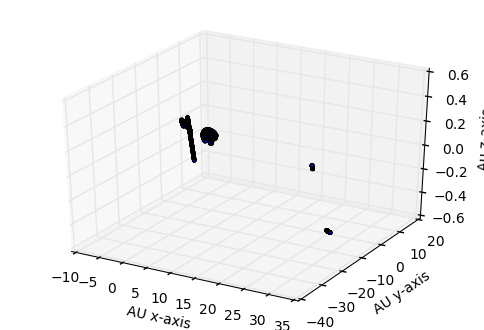

In [7]:
lethergo(1)

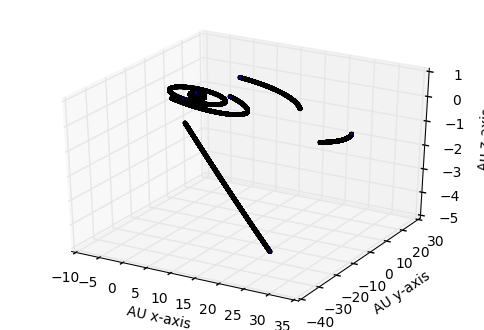

In [8]:
lethergo(15)

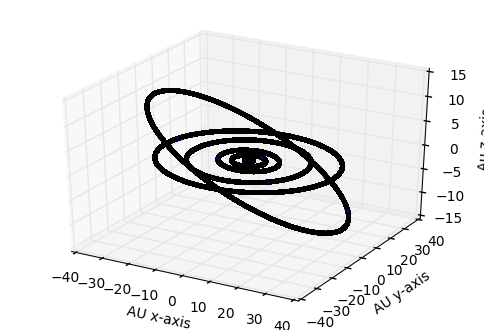

In [9]:
lethergo(250)